In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  



pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap

C:\Users\giuli\AppData\Local\Temp\ipykernel_12656\1517381546.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


C:\Users\giuli\AppData\Local\Temp\ipykernel_12656\4204929831.py:22: RuntimeWarning: invalid value encountered in scalar power
  return out + (steep_fac - 1)*(90 - out)**0.7


<Figure size 640x480 with 0 Axes>

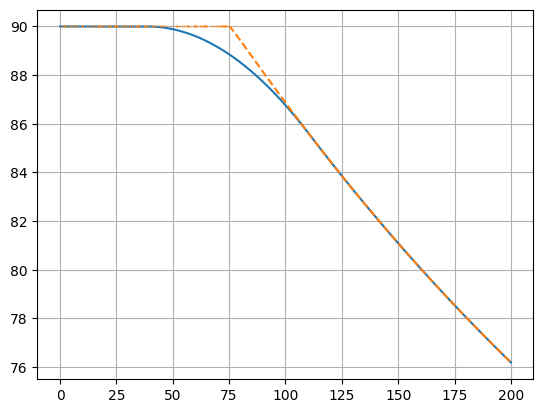

In [62]:
steep_fac = 1 + 0.14 + 0.05
v0 = 38.7096

def midval(a, b, c):
    maxx = max(max(a,b), c)
    minn = min(min(a, b), c)
    
    return a + b + c - maxx - minn



def nominal_pitch_prof(rel_v, steep_fac):

    p1 = -0.0088
    p2 = 30.5
    p3 = 28000
    q1 = 3.923
    
    x = rel_v + 400
    out = midval((p1*x**2 + p2*x + p3)/(x + q1), 0, 90)
    
    return out + (steep_fac - 1)*(90 - out)**0.7

def first_stage_pitch(curv):

    v0 = 38.7096
    vmatch = 110

    steep_fac = 1 + 0.14 + 0.05

    vrel = curv - v0



    if (curv < v0):
        return 90
    else:

        pitch_prof = 0
        if (curv < vmatch):

            vrel_match = vmatch - v0

            prof_match = nominal_pitch_prof(vrel_match, steep_fac)

            dv = 2
            dp_dv = (nominal_pitch_prof(vrel_match + dv, steep_fac) - prof_match) / dv

            c_ = ( 2*(prof_match - 90) - dp_dv * vrel_match ) / vrel_match**3
            b_ = (-dp_dv - 3*c_*vrel_match**2)/(2*vrel_match)

            pitch_prof = 90 - ( b_ + c_ * vrel) * vrel**2
        else:
            pitch_prof = nominal_pitch_prof(vrel, steep_fac)

        return pitch_prof


vel = np.linspace(0,  200, 1000)
pitch = [first_stage_pitch(v) for v in vel]
nom_p = [nominal_pitch_prof(v - v0, steep_fac) for v in vel]


plt.figure()
plt.grid()
plt.plot(vel, pitch)
plt.plot(vel, nom_p, '--')